In [13]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category= FutureWarning)
import pandas_profiling

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

# expolratory data analysis

In [3]:
df.shape

(583, 11)

In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df['is_patient'].unique()

array([1, 2], dtype=int64)

In [8]:
print(df.is_patient.value_counts())

1    416
2    167
Name: is_patient, dtype: int64


 replace the value 1&2 by 0&1 respectively

In [9]:
df['is_patient']=np.where((df.is_patient== int(1)),int(0), df.is_patient)
df['is_patient']= np.where((df.is_patient==int(2)),int(1),df.is_patient)

In [10]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [11]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

Number of Zeros (0):  416
Number of Ones (1):  167


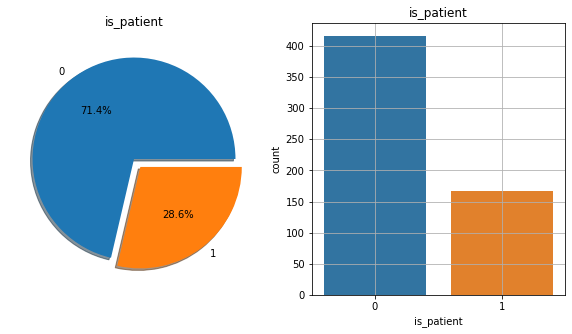

In [14]:
# visulaize the class labels of target variable(Dataset)
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(10,5))
df['is_patient'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_patient')
ax[0].set_ylabel('')
sns.countplot('is_patient',data=df,ax=ax[1])
ax[1].set_title('is_patient')
Zeros, ones = df['is_patient'].value_counts()
print('Number of Zeros (0): ',Zeros)
print('Number of Ones (1): ',ones)
plt.grid()
plt.show()

drop duplicates

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(570, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           566 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


fill the null values

In [18]:
mean_value=df['alkphos'].mean()
print(mean_value)
df['alkphos']= df['alkphos'].fillna(mean_value)


0.9480035335689051


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           570 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [20]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.948004,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


changing categorical value into numerical value

In [21]:
dummy= pd.get_dummies(df['gender'])
dummy.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
df=pd.concat([df,dummy], axis=1)
df=df.drop('gender', axis=1)

In [23]:
#create independent and dependent variable
target_name='is_patient'

y=df[target_name]

x=df.drop(target_name, axis=1)

In [24]:
x.shape

(570, 11)

In [25]:
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [26]:
y.shape

(570,)

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_patient, dtype: int64

# Split the Dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#split into train/ test validation dataset
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1)

In [30]:
x_train.shape, y_train.shape

((427, 11), (427,))

In [32]:
x_test.shape, y_test.shape

((143, 11), (143,))

In [33]:
x_train.dtypes, y_train.dtypes

(age                   int64
 tot_bilirubin       float64
 direct_bilirubin    float64
 tot_proteins          int64
 albumin               int64
 ag_ratio              int64
 sgpt                float64
 sgot                float64
 alkphos             float64
 Female                uint8
 Male                  uint8
 dtype: object,
 dtype('int64'))

# Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_val=sc.transform(x_test)

# fit the model

In [36]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
#Predict Output
gauss_predicted = gaussian.predict(x_test)

In [38]:
gauss_score = round(gaussian.score(x_train, y_train) * 100, 2)
print('Gaussian Score: \n', gauss_score)

Gaussian Score: 
 56.91


In [39]:
gauss_score_test = round(gaussian.score(x_test, y_test) * 100, 2)
print('Gaussian Test Score: \n', gauss_score_test)

Gaussian Test Score: 
 72.03


accuracy score

In [40]:
from sklearn.metrics import accuracy_score
gauss_accuracy_score=round(accuracy_score(y_test, gauss_predicted)*100)
print('Accuracy: \n', gauss_accuracy_score)

Accuracy: 
 72.0


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,gauss_predicted))

[[103   0]
 [ 40   0]]


In [43]:
print(classification_report(y_test,gauss_predicted))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       103
           1       0.00      0.00      0.00        40

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Precison

In [44]:
from sklearn.metrics import precision_score

In [45]:
print("precision Score of macro is:", precision_score(y_test,gauss_predicted, average='macro')*100)
print("precision Score of micro is:", precision_score(y_test,gauss_predicted, average='micro')*100)
print("precision Score of weighted is:", precision_score(y_test,gauss_predicted, average='weighted')*100)

precision Score of macro is: 36.01398601398601
precision Score of micro is: 72.02797202797203
precision Score of weighted is: 51.88028754462321


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# recall

In [46]:
from sklearn.metrics import recall_score
print("recall_Score of macro is:",recall_score(y_test,gauss_predicted, average='macro')*100)
print("recall_Score of micro is:",recall_score(y_test,gauss_predicted, average='micro')*100)
print("recall_Score of weighted is:",recall_score(y_test,gauss_predicted, average='weighted')*100)

recall_Score of macro is: 50.0
recall_Score of micro is: 72.02797202797203
recall_Score of weighted is: 72.02797202797203


# F1 score

In [47]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_test, gauss_predicted, average='macro')*100)
print('f1_score of micro :',f1_score(y_test, gauss_predicted, average='micro')*100)
print('f1_score of weighted :',f1_score(y_test, gauss_predicted, average='weighted')*100)

f1_score of macro : 41.86991869918699
f1_score of micro : 72.02797202797203
f1_score of weighted : 60.31610665757007


In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
gauss_y_pred_prob = gaussian.predict_proba(x_test)[:,1]
FPR,TPR, thresholds = roc_curve(y_test, gauss_y_pred_prob)

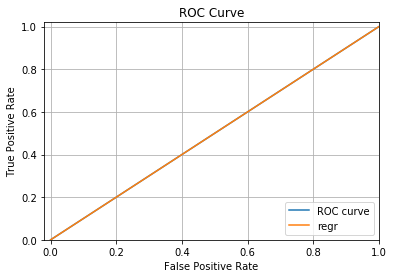

In [50]:
# create plot
plt.plot(FPR,TPR, label='ROC curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
gauss_auc = round(roc_auc_score(y_test,gauss_y_pred_prob)*100,2)
print('roc_auc_score :',gauss_auc)

roc_auc_score : 50.0
